### **Projeto 2**

#### **Título do Projeto:**

*Otimização de Carteira de Ações Brasileiras com a Teoria Moderna do Portfólio (Markowitz)*

#### **Objetivo:**

Construir uma carteira com diferentes ações brasileiras e, através de simulação, encontrar a alocação de capital ótima entre elas. O objetivo é visualizar a "Fronteira Eficiente" e identificar duas carteiras principais: a de **mínima volatilidade** e a de **máximo Índice de Sharpe** (melhor retorno ajustado ao risco).

#### **Ferramentas:**

  * Python
  * Bibliotecas: Pandas, yfinance, NumPy (para cálculos matemáticos), Matplotlib/Seaborn.

-----

#### **Passo 1: Obtenção dos Dados e Cálculo dos Retornos**

Primeiro, vou buscar os dados de um grupo de 4 empresas de setores diferentes e calcular seus retornos diários. Usaremos os retornos logarítmicos, que são matematicamente mais fáceis de trabalhar em otimizações.

In [ ]:

# -------------------------------------------------------------------
# PROJETO 2: OTIMIZAÇÃO DE CARTEIRA (MARKOWITZ)
# -------------------------------------------------------------------

# Passo 0: Instalações
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Obtenção dos Dados
print("--- Etapa 1: Carregando Dados ---")

# Escolhendo ativos de setores diferentes
# VALE3 (Mineração), ITUB4 (Bancos), MGLU3 (Varejo), WEGE3 (Indústria)
tickers = ['VALE3.SA', 'ITUB4.SA', 'MGLU3.SA', 'WEGE3.SA']
start_date = '2020-01-01'
end_date = '2025-01-01'

# Baixando os preços de fechamento (já ajustados por padrão)
precos = pd.DataFrame()
for ticker in tickers:
    precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

# Calcular os retornos logarítmicos diários
retornos = np.log(precos / precos.shift(1))
retornos.dropna(inplace=True)

print("Retornos Diários Logarítmicos:")
print(retornos.head())
print("\n")

--- Etapa 1: Carregando Dados ---


/tmp/ipython-input-1-2405072276.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-2405072276.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-2405072276.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-2405072276.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precos[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']
[****

Retornos Diários Logarítmicos:
            VALE3.SA  ITUB4.SA  MGLU3.SA  WEGE3.SA
Date                                              
2020-01-03 -0.007390 -0.010574 -0.008960 -0.012852
2020-01-06 -0.005951 -0.014994  0.000818  0.002583
2020-01-07  0.007248 -0.023473 -0.002865  0.007711
2020-01-08  0.000185 -0.016428  0.030281 -0.038572
2020-01-09 -0.013233 -0.020134  0.034975 -0.014894




#### **Passo 2: Simulação de Monte Carlo para Milhares de Carteiras**

Geração de milhares de carteiras aleatórias, cada uma com uma combinação de pesos diferente para os nossos ativos. Para cada carteira, calcularemos seu retorno esperado, sua volatilidade (risco) e seu Índice de Sharpe.

In [ ]:

# Passo 2: Simulação de Monte Carlo
print("--- Etapa 2: Simulando Carteiras Aleatórias ---")

# Número de simulações de carteiras
num_carteiras = 20000

# Preparando listas para guardar os resultados
resultados_carteiras = np.zeros((3, num_carteiras))
pesos_carteiras = []

# Média dos retornos anualizada e matriz de covariância anualizada
retorno_medio_anual = retornos.mean() * 252
matriz_cov_anual = retornos.cov() * 252

for i in range(num_carteiras):
    # Gera pesos aleatórios e os normaliza para que a soma seja 1
    pesos = np.random.random(len(tickers))
    pesos /= np.sum(pesos)
    pesos_carteiras.append(pesos)

    # Calcula o retorno, volatilidade e Sharpe Ratio da carteira
    retorno_carteira = np.sum(retorno_medio_anual * pesos)
    volatilidade_carteira = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov_anual, pesos)))

    # Armazena os resultados
    resultados_carteiras[0,i] = retorno_carteira
    resultados_carteiras[1,i] = volatilidade_carteira
    # Sharpe Ratio (assumindo taxa livre de risco de 10% a.a., similar à Selic recente)
    taxa_livre_risco = 0.10
    resultados_carteiras[2,i] = (retorno_carteira - taxa_livre_risco) / volatilidade_carteira

print(f"{num_carteiras} carteiras simuladas com sucesso.\n")

--- Etapa 2: Simulando Carteiras Aleatórias ---
20000 carteiras simuladas com sucesso.



#### **Passo 3: Visualização da Fronteira Eficiente e Identificação das Carteiras Ótimas**

Vamos plotar os resultados e encontrar as duas carteiras mais importantes.

--- Etapa 3: Identificando Carteiras Ótimas e Plotando a Fronteira Eficiente ---


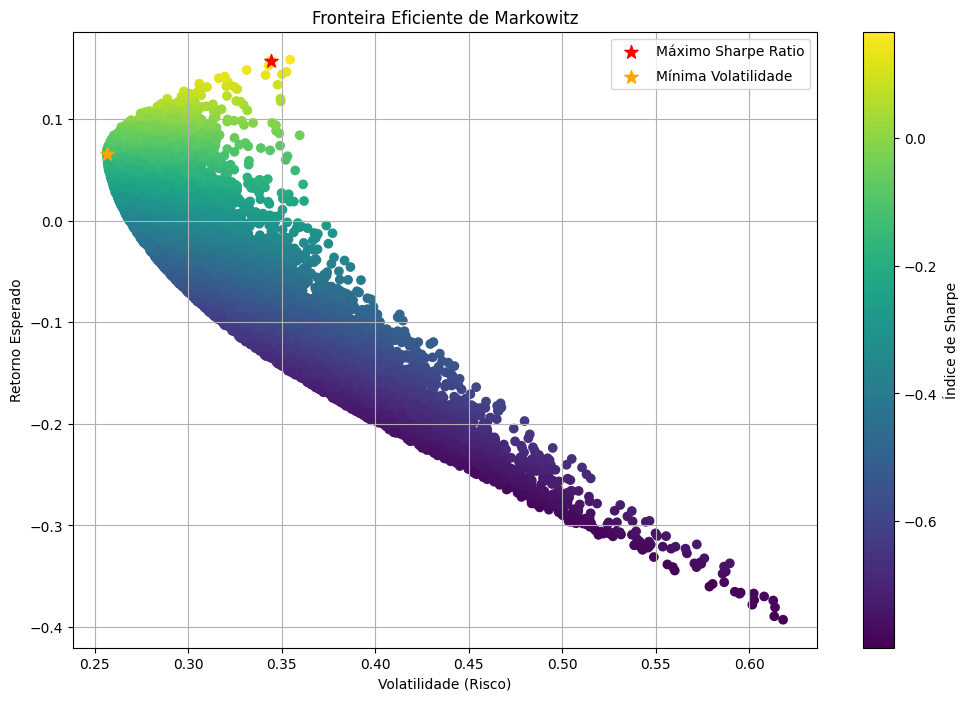

--------------------------------------------------
Carteira de Máximo Índice de Sharpe (Melhor Risco-Retorno):
Retorno: 15.71% | Volatilidade: 34.40%
  VALE3.SA: 7.08%
  ITUB4.SA: 5.28%
  MGLU3.SA: 0.64%
  WEGE3.SA: 87.00%
--------------------------------------------------
Carteira de Mínima Volatilidade (Mais Segura):
Retorno: 6.50% | Volatilidade: 25.63%
  VALE3.SA: 26.67%
  ITUB4.SA: 44.20%
  MGLU3.SA: 0.38%
  WEGE3.SA: 28.75%
--------------------------------------------------


In [ ]:

# Passo 3: Visualização e Análise
print("--- Etapa 3: Identificando Carteiras Ótimas e Plotando a Fronteira Eficiente ---")

# Encontra a carteira com o maior Índice de Sharpe
max_sharpe_idx = np.argmax(resultados_carteiras[2])
retorno_max_sharpe = resultados_carteiras[0,max_sharpe_idx]
vol_max_sharpe = resultados_carteiras[1,max_sharpe_idx]
pesos_max_sharpe = pesos_carteiras[max_sharpe_idx]

# Encontra a carteira com a menor volatilidade
min_vol_idx = np.argmin(resultados_carteiras[1])
retorno_min_vol = resultados_carteiras[0,min_vol_idx]
vol_min_vol = resultados_carteiras[1,min_vol_idx]
pesos_min_vol = pesos_carteiras[min_vol_idx]

# Plot da Fronteira Eficiente
plt.figure(figsize=(12, 8))
# Scatter plot de todas as carteiras simuladas, coloridas pelo Sharpe Ratio
plt.scatter(resultados_carteiras[1,:], resultados_carteiras[0,:], c=resultados_carteiras[2,:], cmap='viridis', marker='o')
plt.colorbar(label='Índice de Sharpe')
plt.title('Fronteira Eficiente de Markowitz')
plt.xlabel('Volatilidade (Risco)')
plt.ylabel('Retorno Esperado')

# Destaca as carteiras ótimas no gráfico
plt.scatter(vol_max_sharpe, retorno_max_sharpe, c='red', s=100, marker='*', label='Máximo Sharpe Ratio')
plt.scatter(vol_min_vol, retorno_min_vol, c='orange', s=100, marker='*', label='Mínima Volatilidade')

plt.legend(labelspacing=0.8)
plt.grid(True)
plt.show()

# Imprime a composição das carteiras ótimas
print("-" * 50)
print("Carteira de Máximo Índice de Sharpe (Melhor Risco-Retorno):")
print(f"Retorno: {retorno_max_sharpe*100:.2f}% | Volatilidade: {vol_max_sharpe*100:.2f}%")
for ticker, peso in zip(tickers, pesos_max_sharpe):
    print(f"  {ticker}: {peso*100:.2f}%")

print("-" * 50)
print("Carteira de Mínima Volatilidade (Mais Segura):")
print(f"Retorno: {retorno_min_vol*100:.2f}% | Volatilidade: {vol_min_vol*100:.2f}%")
for ticker, peso in zip(tickers, pesos_min_vol):
    print(f"  {ticker}: {peso*100:.2f}%")
print("-" * 50)